# Example

Example usage of PyWSRA: input/output, standard operations, and plotting.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pywsra
import xarray as xr


## Input

Read the data in `example_data`.  This folder contains WSRA data from two successive flights into Hurricane Earl (September 2022).

PyWSRA uses xarray Datasets as the primary data structure, since netCDF files read into this format well. For more information on the usage of xarray, see: TODO: link!

 When using `pywsra.read_wsra_directory()`, the data in the two files, `WSRA-L4-20220904H1.nc` and `WSRA-L4-20220905H1.nc`, will be concatenated into a single Dataset.

In [13]:
WSRA_PATH = './example_data/'
ds = pywsra.read_wsra_directory(WSRA_PATH, index_by_time=True)

The Dataset `ds` contains the data from 2022-09-04 and 2022-09-05.  With the `index_by_time` keyword argument, the first index of the Dataset is `time`.

In [14]:
ds.attrs['storm_id'] = 'AL062022'  #TODO: remove!


In [15]:
ds

<xarray.Dataset>
Dimensions:                                (time: 380, wavenumber_east: 65,
                                            wavenumber_north: 65, obs: 5,
                                            wavelength: 8)
Coordinates:
  * time                                   (time) datetime64[ns] 2022-09-07T0...
  * wavenumber_east                        (wavenumber_east) float32 -0.07854...
  * wavenumber_north                       (wavenumber_north) float32 -0.0785...
  * wavelength                             (wavelength) float32 366.0 ... 91.0
  * obs                                    (obs) timedelta64[ns] -1 days +23:...
Data variables: (12/28)
    directional_wave_spectrum              (time, wavenumber_east, wavenumber_north) float32 ...
    directional_wave_spectrum_180          (time, wavenumber_east, wavenumber_north) float32 ...
    dominant_to_secondary_partition_angle  (time) float32 nan nan ... nan 265.5
    dominant_wave_direction                (time) float32 nan nan ... nan -139.4
    dominant_wave_height                   (time) float32 nan nan ... nan 10.43
    dominant_wave_wavelength               (time) float32 nan nan ... nan 379.7
    ...                                     ...
    secondary_wave_height                  (time) float32 nan nan ... nan 3.121
    secondary_wave_wavelength              (time) float32 nan nan ... nan 92.98
    wind_direction                         (time) float32 228.5 215.6 ... 251.8
    wind_speed                             (time) float32 5.82 6.78 ... 13.38
    wave_direction_predicted               (time, wavelength) float32 29.83 ....
    swh_correction_ratio                   (time) float32 nan nan ... nan 1.36
Attributes:
    title:                ['WSRA level 4 data']
    history:              ['revision: 1.6; date: 20180816; author: NMS/IPS']
    flight_id:            ['20220907H1']
    mission_id:           ['NONE NONE']
    storm_id:             AL062022
    date_created:         ['2022-11-22T16:43:25Z']
    time_coverage_start:  2022-09-07 08:31:26+00:00
    time_coverage_end:    2022-09-07 13:47:16+00:00

## Basic functionality

PyWSRA extends the functionality of xarray using "accessors" (TODO: link here).  Accessors enable custom, project-specific methods and properties to be added to Datasets and DataArrays.  PyWSRA accessors are accessed by appending `.wsra` to a Dataset or DataArray call.

For example, the PyWSRA DataSet accessor:

In [16]:
ds.wsra

and similarly, the PyWSRA DataArray accessor:

In [17]:
ds['directional_wave_spectrum'].wsra

Datasets and DataArrays with accessors maintain all the functionality of xarray.  Many of the accessor methods and properties will be covered in the following sections.

## Basic Operations

This section covers many of the basic operations available in the PyWSRA Dataset and DataArray accessors.

### Masking

Data (*especially* radar data) can be messy.  Even after substantial quality control, portions of the data must be masked based on mission- and environment-specific knowledge.  Though xarray does not yet support numpy masked arrays, data can be masked using the `ds.wsra.mask()` method.

First, a mask must be created.  Currently, only masks along the flight trajectory (the coordinate `'trajectory'` or `'time'` depending on whether `index_by_time` is set to `True` when loading the data) are supported.

 Masks are created using `ds.wsra.create_trajectory_mask`:

In [18]:
ds.wsra.create_trajectory_mask()
ds['time_mask']

<xarray.DataArray 'time_mask' (time: 380)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
...
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])
Coordinates:
  * time       (time) datetime64[ns] 2022-09-07T08:31:26 ... 2022-09-07T13:47:16
    time_mask  (time) bool False False False False ... False False False False
Attributes:
    num_masked_values:               113
    wsra_computed_roll_bounds:       (-3.0, 3.0)
    platform_radar_altitude_bounds:  (500.0, 4000.0)

By default, the altitude and roll limits specified by Pincus et al. (2021) are used:

`'platform_radar_altitude'` $\in$ [500, 4000] m \
abs(`'wsra_computed_roll'`) $<$ 3 deg

However it is often desirable to include additional masks, e.g. based on `'peak_spectral_variance'` (psv), `'platform_speed_wrt_ground'`, or other variables which have the trajectory (or `time`) dimension as their only coordinate.

`'platform_radar_altitude'`, `'peak_spectral_variance'` and `'platform_speed_wrt_ground'` can be provided directly to this method using tuples (`'wsra_computed_roll'` is a single float) as the keyword arguments `'roll_limit'`, `'altitude_limits'`, `'psv_limits'`, and `'speed_limits'`.

Additional trajectory variables can be supplied using the `mask_dict`:


In [19]:
mask_dict = {'rainfall_rate_median': (0, 10)}
ds.wsra.create_trajectory_mask(mask_dict)
ds['time_mask']

<xarray.DataArray 'time_mask' (time: 380)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
...
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])
Coordinates:
  * time       (time) datetime64[ns] 2022-09-07T08:31:26 ... 2022-09-07T13:47:16
    time_mask  (time) bool True True True True True ... True True True True True
Attributes:
    num_masked_values:            23
    rainfall_rate_median_bounds:  (0, 10)

Note if a `mask_dict` is used, the default altitude and roll values are not used.

Once a mask is created, it can be applied using the `ds.wsra.mask()` method:

In [20]:
ds.wsra.mask()

<xarray.Dataset>
Dimensions:                                (time: 380, wavenumber_east: 65,
                                            wavenumber_north: 65, obs: 5,
                                            wavelength: 8)
Coordinates:
  * time                                   (time) datetime64[ns] 2022-09-07T0...
  * wavenumber_east                        (wavenumber_east) float32 -0.07854...
  * wavenumber_north                       (wavenumber_north) float32 -0.0785...
  * wavelength                             (wavelength) float32 366.0 ... 91.0
  * obs                                    (obs) timedelta64[ns] -1 days +23:...
    time_mask                              (time) bool True True ... True True
Data variables: (12/28)
    directional_wave_spectrum              (time, wavenumber_east, wavenumber_north) float32 ...
    directional_wave_spectrum_180          (time, wavenumber_east, wavenumber_north) float32 ...
    dominant_to_secondary_partition_angle  (time) float32 nan nan ... nan 265.5
    dominant_wave_direction                (time) float32 nan nan ... nan -139.4
    dominant_wave_height                   (time) float32 nan nan ... nan 10.43
    dominant_wave_wavelength               (time) float32 nan nan ... nan 379.7
    ...                                     ...
    secondary_wave_height                  (time) float32 nan nan ... nan 3.121
    secondary_wave_wavelength              (time) float32 nan nan ... nan 92.98
    wind_direction                         (time) float32 228.5 215.6 ... 251.8
    wind_speed                             (time) float32 5.82 6.78 ... 13.38
    wave_direction_predicted               (time, wavelength) float32 29.83 ....
    swh_correction_ratio                   (time) float32 nan nan ... nan 1.36
Attributes:
    title:                ['WSRA level 4 data']
    history:              ['revision: 1.6; date: 20180816; author: NMS/IPS']
    flight_id:            ['20220907H1']
    mission_id:           ['NONE NONE']
    storm_id:             AL062022
    date_created:         ['2022-11-22T16:43:25Z']
    time_coverage_start:  2022-09-07 08:31:26+00:00
    time_coverage_end:    2022-09-07 13:47:16+00:00

This returns a copy of the Dataset with values masked as NaNs (it must be assigned to a new variable). Note `ds.wsra.mask()` uses xarray's built-in `Dataset.where()` such that additional keyword arguments to `ds.wsra.mask()` are collected and passed to this built-in method.  For example, to drop the masked values, pass `drop=True`:

In [21]:
ds_masked = ds.wsra.mask(drop=True)
ds_masked

<xarray.Dataset>
Dimensions:                                (time: 357, wavenumber_east: 65,
                                            wavenumber_north: 65, obs: 5,
                                            wavelength: 8)
Coordinates:
  * time                                   (time) datetime64[ns] 2022-09-07T0...
  * wavenumber_east                        (wavenumber_east) float32 -0.07854...
  * wavenumber_north                       (wavenumber_north) float32 -0.0785...
  * wavelength                             (wavelength) float32 366.0 ... 91.0
  * obs                                    (obs) timedelta64[ns] -1 days +23:...
    time_mask                              (time) bool True True ... True True
Data variables: (12/28)
    directional_wave_spectrum              (time, wavenumber_east, wavenumber_north) float32 ...
    directional_wave_spectrum_180          (time, wavenumber_east, wavenumber_north) float32 ...
    dominant_to_secondary_partition_angle  (time) float32 nan nan ... nan 265.5
    dominant_wave_direction                (time) float32 nan nan ... nan -139.4
    dominant_wave_height                   (time) float32 nan nan ... nan 10.43
    dominant_wave_wavelength               (time) float32 nan nan ... nan 379.7
    ...                                     ...
    secondary_wave_height                  (time) float32 nan nan ... nan 3.121
    secondary_wave_wavelength              (time) float32 nan nan ... nan 92.98
    wind_direction                         (time) float32 228.5 215.6 ... 251.8
    wind_speed                             (time) float32 5.82 6.78 ... 13.38
    wave_direction_predicted               (time, wavelength) float32 29.83 ....
    swh_correction_ratio                   (time) float32 nan nan ... nan 1.36
Attributes:
    title:                ['WSRA level 4 data']
    history:              ['revision: 1.6; date: 20180816; author: NMS/IPS']
    flight_id:            ['20220907H1']
    mission_id:           ['NONE NONE']
    storm_id:             AL062022
    date_created:         ['2022-11-22T16:43:25Z']
    time_coverage_start:  2022-09-07 08:31:26+00:00
    time_coverage_end:    2022-09-07 13:47:16+00:00

### Storm coordinates

A storm-centric coordinate system is often powerful when analyzing hurricane data.  PyWSRA provides a `ds.wsra.to_storm_coord()` method to rotate the flight track into a storm coordinate system which is aligned with the hurricane's heading (at each time step) and where distance is represented by the x- and y-distance to the hurricane eye.

Headings are obtained by interpolating best track data from IBTrACS (Knapp et al., 2010; Knapp et al., 2018) onto the WSRA flight times. 

In [22]:
ds.wsra.to_storm_coord()

We can compare the new, hurricane-centric coordinates with the east and north eye distances already provided in the dataset.

In [23]:
ds['time'][0].values - np.timedelta64(1, 'h')

numpy.datetime64('2022-09-07T07:31:26.000000000')

In [24]:
time_slice = slice(ds['time'][0].values - np.timedelta64(3, 'h'), ds['time'][-1].values)
ds.wsra.best_track.gdf[time_slice]

/opt/homebrew/Caskroom/miniconda/base/envs/PyWSRA/lib/python3.10/site-packages/geopandas/geodataframe.py:1299: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  result = super(GeoDataFrame, self).__getitem__(key)


,index,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,...,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR,geometry
ISO_TIME,,,,,,,,,,,,,,,,,,,,,
2022-09-07 06:00:00+00:00,15451,2022246N18301,2022,28,NaN,NaN,EARL,TS,25.0000,-65.9000,...,,,12,150,120,90,120,4,357,POINT (-65.90000 25.00000)
2022-09-07 09:00:00+00:00,15452,2022246N18301,2022,28,NaN,NaN,EARL,TS,25.1850,-65.8725,...,,,12,150,120,105,135,4,12,POINT (-65.87250 25.18500)
2022-09-07 12:00:00+00:00,15453,2022246N18301,2022,28,NaN,NaN,EARL,TS,25.4000,-65.8000,...,,,12,150,120,120,150,6,16,POINT (-65.80000 25.40000)


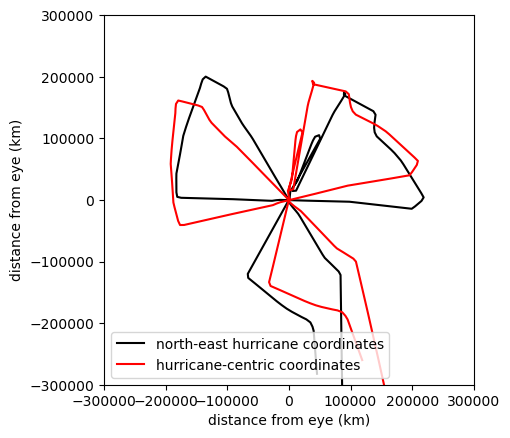

In [25]:
fig, ax = plt.subplots()
ax.plot(ds['hurricane_eye_distance_east'],
        ds['hurricane_eye_distance_north'],
        color='k',
        label='north-east hurricane coordinates')
ax.plot(ds['hurricane_eye_distance_east_storm_coord'],
        ds['hurricane_eye_distance_north_storm_coord'],
        color='red',
        label='hurricane-centric coordinates')
ax.set_xlim(3*10**5 * np.array([-1, 1]))
ax.set_ylim(3*10**5 * np.array([-1, 1]))
ax.set_xlabel('distance from eye (km)')
ax.set_ylabel('distance from eye (km)')
ax.set_aspect('equal')
ax.legend(loc='lower left')

In [26]:
time_slice = slice(ds.attrs['time_coverage_start'],
                   ds.attrs['time_coverage_end'])

ds.wsra.best_track.df[time_slice]['STORM_DIR']

ISO_TIME
2022-09-07 09:00:00+00:00    12
2022-09-07 12:00:00+00:00    16
Name: STORM_DIR, dtype: object

## Visualization

<GeoAxes: >

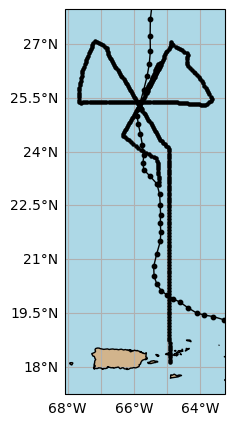

In [27]:
# ds.wsra.plot(plot_best_track=False)
ds.wsra.plot()

## References

Knapp, K. R., Diamond, H. J., Kossin, J. P., Kruk, M. C., & Schreck, C. J. (2018). International Best Track Archive for Climate Stewardship (IBTrACS) Project, version 04r00 [Dataset]. National Centers for Environmental Information. https://doi.org/10.25921/82ty-9e16

Knapp, K. R., Kruk, M. C., Levinson, D. H., Diamond, H. J., & Neumann, C. J. (2010). The International Best Track Archive for Climate Stew- ardship, (IBTrACS): Unifying tropical cyclone best track data. Bulletin of the American Meteorological Society, 91(3), 363–376. https://doi. org/10.1175/2009BAMS2755.1

Pincus, R. et al. Observations from the NOAA P-3 aircraft during ATOMIC. Earth Syst. Sci. Data 13, 3281–3296 (2021).